# Part I: Dataset Download and Cleaning

## Import Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px
import dataframe_image as dfi

## Dataset Download & Column Drop

In [37]:
###################################################################################################################
### DATA READING & CONCAT ###
#############################

# read and concat all JSON files
path_to_json = r'./data'
json_files = glob.glob(os.path.join(path_to_json, '*.json'))
df = pd.concat((pd.read_json(f) for f in json_files))

# print before and after column drops
# dfi.export(df.head(10),"before-cleaning.png")
df = df.drop(columns=['REL_INSP_NR', 'CONST_OP', 'CONST_OP_CAUSE', 'FAT_CAUSE', 'INJURY_LINE_NR', 'LOAD_DT', 'RNUM'])
# dfi.export(df.head(10),"after-cleaning.png")

AGE_df = pd.DataFrame({'Age Counts':df['AGE'].value_counts()})
# dfi.export(AGE_df, "Age_Counts.png")

SEX_df = pd.DataFrame({'Sex Counts':df['SEX'].value_counts()})
# dfi.export(SEX_df, "Sex_Counts.png")

FALL_HT_counts_df = pd.DataFrame({'Fall Height Counts':df['FALL_HT'].value_counts()})
FALL_DISTANCE_counts_df = pd.DataFrame({'Fall Distance Counts':df['FALL_DISTANCE'].value_counts()})

# print('Unique Fall Height Counts')
# print(FALL_HT_counts_df.shape)
# print('\n')
# print('Unique Fall Distance Counts')
# print(FALL_HT_counts_df.shape)

fall_causes_df = df[df['EVENT_TYPE']==4]
fall_causes_df

fall_ht_only = fall_causes_df[fall_causes_df['FALL_HT']!='']
fall_ht_only

###

,SUMMARY_NR,AGE,SEX,NATURE_OF_INJ,PART_OF_BODY,SRC_OF_INJURY,EVENT_TYPE,EVN_FACTOR,HUM_FACTOR,OCC_CODE,DEGREE_OF_INJ,TASK_ASSIGNED,HAZSUB,FALL_DISTANCE,FALL_HT
173,202718656,54,M,5,19,42,4,18,20,869,2,1,,,1
12,170840151,41,M,12,4,42,4,13,1,795,2,1,,,4
19,170840243,45,M,12,11,47,4,13,10,567,2,1,,,7
145,200580041,37,M,21,19,42,4,13,4,999,1,2,,,10
67,202721494,54,M,12,9,42,4,17,14,999,1,1,,,1
147,202474524,27,M,5,17,43,4,18,20,595,2,1,,,4
8,202563250,24,M,5,2,8,4,18,1,999,2,1,,,1
117,202475398,62,M,21,13,43,4,18,14,853,1,1,,,4
27,200033074,50,M,7,15,43,4,18,14,999,1,1,,,3
14,170838445,33,M,12,11,30,4,8,6,594,2,1,,,1


## Age Binning

,Sex
,5032
M,4556
F,412


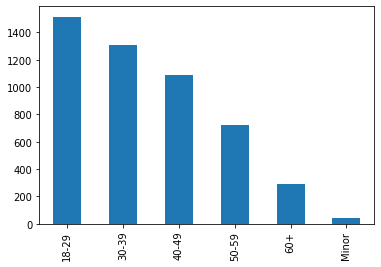

In [69]:
### TRUE AGE COUNT ###



df['BINS'] = pd.cut(x=df['AGE'], bins=[1, 17, 30, 40, 50, 60, np.inf], labels=['Minor',
                                                                               '18-29',
                                                                               '30-39',
                                                                               '40-49',
                                                                               '50-59',
                                                                               '60+'])
 
# check the frequency of each bin
df['BINS'].unique()

df['BINS'].value_counts().plot.bar()

pd.DataFrame({'Sex':df['SEX'].value_counts()})

###################################################################################################################
############
### misc ###
############
# age_filtered = df[df['AGE'] > 0]

# print(age_filtered[:5])

# df['AGE_BINS'] = pd.cut(x=age_filtered, bins=[1, 12, 17, np.inf], labels=['Child', 'Teen', 'Adult'])

# df['AGE_BINS'][:5]

#age_percentages = age_count.value_counts(normalize=True)*100

# age_count.unique()

# ### Creating new DF from columns ###
# age_report_df = pd.DataFrame(
#     {'Age Count': age_count,
#     'Incidence Rate': age_percentages
#     }
# )
# age_report_df['Incidence Rate'] = age_report_df['Incidence Rate'].round(decimals=2)

# #pd.set_option('display.max_rows', None)
# age_report_df.head().style.hide_index()

# age_report_df.plot.bar(x='Age Count', y='Incidence Rate', logy=True)
# # age_filtered['AGE'].unique().plot.bar()
# age_filtered[:25].value_counts().plot.bar(logy=True)
# # age_binned.value_counts().plot.bar()

In [9]:
df2 = df[['NATURE_OF_INJ', 'PART_OF_BODY', 'DEGREE_OF_INJ', 'EVENT_TYPE']]

#df2.set_index('SUMMARY_NR', inplace = True)
df2=df2.copy()

###################################################################################################################
### NATURE OF INJURY ###
########################

### Import IMIS dictionary - Nature ###
nature_of_inj_df = pd.read_csv('./IMIS_dictionary_files/nature_of_inj.csv', header=0)
nature_of_inj_df.set_index('code', inplace = True)
nature_of_inj_dict = nature_of_inj_df.to_dict()

### Map IMIS dictionary to Nature col ###
df2['NATURE_OF_INJ'] = df2['NATURE_OF_INJ'].map(nature_of_inj_dict['Nature'])

### Expand unique Nature vals to become unique cols ###
df2 = pd.get_dummies(df2, columns=['NATURE_OF_INJ'])

###################################################################################################################
### PART OF BODY ###
####################

### Import IMIS dictionary - Part of Body ###
part_of_body_df = pd.read_csv('./IMIS_dictionary_files/part_of_body.csv', header=0)
part_of_body_df.set_index('Code', inplace = True)
part_of_body_dict = part_of_body_df.to_dict()

### Map IMIS dictionary to Body col ###
df2['PART_OF_BODY'] = df2['PART_OF_BODY'].map(part_of_body_dict['POB'])

### Expand unique Body vals to become unique cols ###
df2 = pd.get_dummies(df2, columns=['PART_OF_BODY'])

###################################################################################################################
### DEGREE OF INJ ###
#####################

### Import IMIS dictionary - Part of Body ###
degree_df = pd.read_csv('./IMIS_dictionary_files/degree.csv', header=0)
degree_df.set_index('code', inplace = True)
degree_dict = degree_df.to_dict()

### Map IMIS dictionary to Body col ###
df2['DEGREE_OF_INJ'] = df2['DEGREE_OF_INJ'].map(degree_dict['degree'])

### Expand unique Body vals to become unique cols ###
df2 = pd.get_dummies(df2, columns=['DEGREE_OF_INJ'])



###################################################################################################################
### EVENT TYPE ###
##################

### Import IMIS dictionary - Event Type ###
degree_df = pd.read_csv('./IMIS_dictionary_files/event.csv', header=0)
degree_df.set_index('code', inplace = True)
degree_dict = degree_df.to_dict()

### Map IMIS dictionary to Event col ###
df2['EVENT_TYPE'] = df2['EVENT_TYPE'].map(degree_dict['Event'])

### Expand unique Event vals to become unique cols ###
df2 = pd.get_dummies(df2, columns=['EVENT_TYPE'])


###################################################################################################################
### Apriori ###
###############

### Strip chars that would cause an error ###
df2.columns = df2.columns.str.replace(" ", "_")
df2.columns = df2.columns.str.replace("/", "_")
df2.columns = df2.columns.str.replace('(', "_")
df2.columns = df2.columns.str.replace(')', "_")
df2.columns = df2.columns.str.replace("__", "_")
df2.columns = df2.columns.str.strip()
df2.columns


### APRIORI ALGORITHM ###
frq_items = apriori(df2, min_support = .01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = .01)
rules = rules.sort_values(['lift', 'confidence'], ascending =[False, False])

### DISPLAY SETTINGS ###
pd.set_option('display.max_colwidth', None)

rules.head(50)

# ### DEFINITIONS ###
# falls = 'EVENT_TYPE_Fall_From_Elevation_'
# fatalities = 'DEGREE_OF_INJ_Fatal'

# ### Filtering for falls only ###
# fall_rules = rules
# fall_rules['consequents'] = ((rules['consequents'][rules['consequents'].astype(str).str.contains(falls)]))
# fall_rules = fall_rules.dropna()
# avg_fall_support = fall_rules['consequent support'].mean().round(decimals=4)
# print('Average support for', falls,': ', avg_fall_support)

# ### Reset! ###
# fatality_rules = rules

# ### Filtering for fatalities only ###
# fatality_rules['consequents'] = ((rules['consequents'][rules['consequents'].astype(str).str.contains(fatalities)]))
# fatality_rules = fatality_rules.dropna()
# avg_fatality_support = fatality_rules['consequent support'].mean().round(decimals=4)
# print('Average support for', fatalities,': ', avg_fatality_support)


# ### TRY TO REFACTOR WITH NUMPY ACCORDING TO ??? ###


# ### Reset! ###
# rules = rules
# rules['consequents'] = ((rules['consequents'][rules['consequents'].astype(str).str.contains(falls)]))
# rules['consequents'] = ((rules['consequents'][rules['consequents'].astype(str).str.contains(fatalities)]))

# ### Frequency of fatal falls ###
# avg_FF_support = rules['consequent support'].mean().round(decimals=4)
# print('Average support for', falls, 'and', fatalities, ': ', avg_FF_support)

# # ### Frequency of fatal falls ###
# # avg_FF_support = ((avg_fall_support + avg_fatality_support)/2).round(decimals=4)
# # print('Average support for', falls, 'and', fatalities, ': ', avg_FF_support)

# # ### Manual math ###
# # print('Manual math: ', (avg_fall_support + avg_fatality_support)/2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
876,"(NATURE_OF_INJ_Electric_shock, PART_OF_BODY_Body_System)","(EVENT_TYPE_Shock, DEGREE_OF_INJ_Fatal)",0.0359,0.0401,0.0223,0.621170,15.490522,0.020860,2.533854
881,"(EVENT_TYPE_Shock, DEGREE_OF_INJ_Fatal)","(NATURE_OF_INJ_Electric_shock, PART_OF_BODY_Body_System)",0.0401,0.0359,0.0223,0.556110,15.490522,0.020860,2.171933
879,"(PART_OF_BODY_Body_System, EVENT_TYPE_Shock)","(NATURE_OF_INJ_Electric_shock, DEGREE_OF_INJ_Fatal)",0.0277,0.0547,0.0223,0.805054,14.717626,0.020785,4.849039
878,"(NATURE_OF_INJ_Electric_shock, DEGREE_OF_INJ_Fatal)","(PART_OF_BODY_Body_System, EVENT_TYPE_Shock)",0.0547,0.0277,0.0223,0.407678,14.717626,0.020785,1.641506
429,"(NATURE_OF_INJ_Electric_shock, DEGREE_OF_INJ_Hospitalized)",(EVENT_TYPE_Shock),0.0124,0.0555,0.0100,0.806452,14.530660,0.009312,4.879917
432,(EVENT_TYPE_Shock),"(NATURE_OF_INJ_Electric_shock, DEGREE_OF_INJ_Hospitalized)",0.0555,0.0124,0.0100,0.180180,14.530660,0.009312,1.204655
425,(NATURE_OF_INJ_Electric_shock),"(EVENT_TYPE_Shock, DEGREE_OF_INJ_Fatal)",0.0696,0.0401,0.0386,0.554598,13.830367,0.035809,2.155130
424,"(EVENT_TYPE_Shock, DEGREE_OF_INJ_Fatal)",(NATURE_OF_INJ_Electric_shock),0.0401,0.0696,0.0386,0.962594,13.830367,0.035809,24.872693
882,(NATURE_OF_INJ_Electric_shock),"(PART_OF_BODY_Body_System, EVENT_TYPE_Shock, DEGREE_OF_INJ_Fatal)",0.0696,0.0233,0.0223,0.320402,13.751172,0.020678,1.437174
875,"(PART_OF_BODY_Body_System, EVENT_TYPE_Shock, DEGREE_OF_INJ_Fatal)",(NATURE_OF_INJ_Electric_shock),0.0233,0.0696,0.0223,0.957082,13.751172,0.020678,21.678320
